In [1]:
from scripts.subscripts.SYNCLUS import SYNCLUS
import numpy as np

from matplotlib import rcParams

rcParams.update({
    "text.usetex": True
})

In [2]:
PTEX_dissim = np.loadtxt("./data/PTEX_DTW_matrix.dat", dtype= np.float64, delimiter = ",")

In [3]:
from scripts.ClusterMetrics import silhouette_score_precomputed, calinski_harabasz_score_precomputed, davies_bouldin_score_precomputed

def GetClusteringMetrics(dissim, Labels):
    SH_score = silhouette_score_precomputed(dissim, Labels)
    CH_score = calinski_harabasz_score_precomputed(dissim, Labels)
    DB_score = davies_bouldin_score_precomputed(dissim, Labels)

    return (SH_score, CH_score, DB_score)

In [4]:
from matplotlib.pyplot import subplots, show

def VisualizeClusterMetrics(metrics_by_num):
    Figure, Subplot = subplots(3, 1, sharex="all", figsize = (7, 7))
    Figure.suptitle("SYNCLUS metrics")

    num_clusters = tuple(metrics_by_num.keys())
    SH, CH, DB = zip(*tuple(metrics_by_num.values()))

    Subplot[0].plot(num_clusters, SH, "-o")
    Subplot[1].plot(num_clusters, CH, "-o")
    Subplot[2].plot(num_clusters, DB, "-o")

    Subplot[2].set_xlabel("No. of clusters")
    Subplot[0].set_ylabel("Silhouette Coefficient")
    Subplot[1].set_ylabel("Calinski-Harabasz Index")
    Subplot[2].set_ylabel("Davies-Bouldin Index")

    Figure.tight_layout()

    show()

In [5]:
metrics_by_clusters = dict()
num_iters = 500
num_reps = 100
num_clusters = tuple(range(2, 11))

for k in num_clusters:
    SYNCLUS_VTEC = SYNCLUS(PTEX_dissim, K = k, iter = num_iters, reps = num_reps)
    Labels = SYNCLUS_VTEC.fit_predict()["end_clusters"]
    Metrics = GetClusteringMetrics(PTEX_dissim, Labels)

    metrics_by_clusters[k] = Metrics

100%|██████████| 100/100 [00:37<00:00,  2.65it/s]


Best SYNCLUS at  4 with  2  clusters
Min, Quartiles, Max
210135.27, 210172.33, 330493.03, 413407.78, 540227.76


100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


Best SYNCLUS at  0 with  3  clusters
Min, Quartiles, Max
116662.19, 145401.72, 201852.89, 236144.81, 470601.54


100%|██████████| 100/100 [01:24<00:00,  1.19it/s]


Best SYNCLUS at  13 with  4  clusters
Min, Quartiles, Max
103842.46, 105576.62, 121669.74, 197330.76, 498413.57


100%|██████████| 100/100 [02:18<00:00,  1.38s/it]


Best SYNCLUS at  50 with  5  clusters
Min, Quartiles, Max
93119.73, 93922.77, 105358.67, 162560.67, 354367.89


100%|██████████| 100/100 [02:51<00:00,  1.71s/it]


Best SYNCLUS at  5 with  6  clusters
Min, Quartiles, Max
83622.61, 90303.88, 95057.5, 122726.44, 296919.21


100%|██████████| 100/100 [03:18<00:00,  1.98s/it]


Best SYNCLUS at  62 with  7  clusters
Min, Quartiles, Max
78688.59, 85560.72, 88457.84, 98842.72, 226976.87


100%|██████████| 100/100 [03:44<00:00,  2.24s/it]


Best SYNCLUS at  38 with  8  clusters
Min, Quartiles, Max
74970.78, 79751.78, 84860.54, 93467.88, 231520.74


100%|██████████| 100/100 [03:33<00:00,  2.13s/it]


Best SYNCLUS at  33 with  9  clusters
Min, Quartiles, Max
71964.9, 75864.25, 80222.64, 89764.52, 184148.67


100%|██████████| 100/100 [03:47<00:00,  2.28s/it]


Best SYNCLUS at  74 with  10  clusters
Min, Quartiles, Max
68007.73, 73186.69, 75577.84, 86950.3, 219107.03


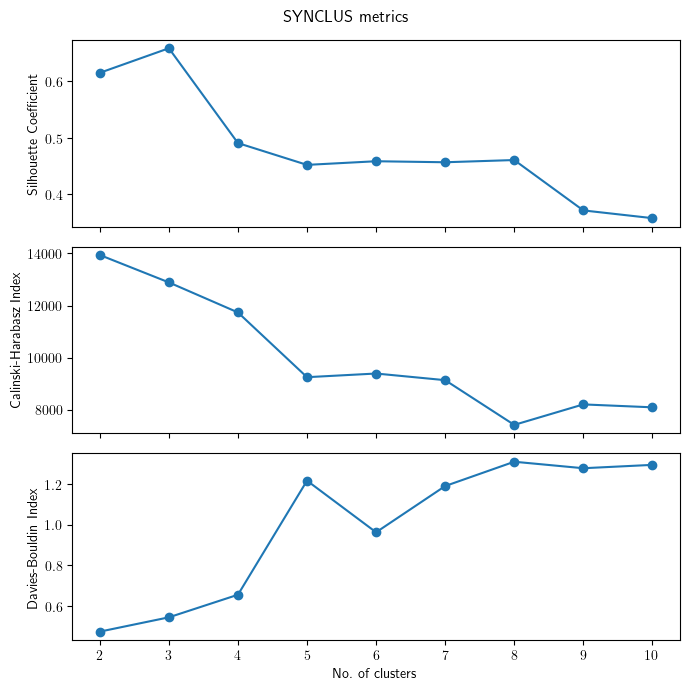

In [6]:
VisualizeClusterMetrics(metrics_by_clusters)

In [7]:
BestLabelsSYNCLUS = SYNCLUS(PTEX_dissim, K = 3, iter = num_iters, reps = num_reps).fit_predict()["end_clusters"]

np.savetxt("./data/PTEX_SYNCLUS_Labels.dat", BestLabelsSYNCLUS.reshape(BestLabelsSYNCLUS.size, 1), fmt = "%d")

100%|██████████| 100/100 [00:37<00:00,  2.64it/s]

Best SYNCLUS at  13 with  3  clusters
Min, Quartiles, Max
116662.19, 188785.51, 204544.35, 281973.69, 516976.26
